<a href="https://colab.research.google.com/github/Rishu5kumar/Temperature_anomaly/blob/main/Temperature_uncertainity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [2]:
df = pd.read_csv('temperature.csv')

In [3]:
df.shape

(577462, 4)

In [4]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [6]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [7]:
df.isna().sum()

,0
dt,0
AverageTemperature,32651
AverageTemperatureUncertainty,31912
Country,0


In [8]:
# Handle missing values and duplicates
imputer_num = SimpleImputer(strategy='mean')
df['AverageTemperature'] = imputer_num.fit_transform(df[['AverageTemperature']])
df['AverageTemperatureUncertainty'] = imputer_num.fit_transform(df[['AverageTemperatureUncertainty']])

df = df.drop_duplicates()

In [9]:
df.isna().sum()

,0
dt,0
AverageTemperature,0
AverageTemperatureUncertainty,0
Country,0


In [10]:
# Convert 'dt' to datetime
# In pd, if data is separated with '-' then no need to specify the format explicitly
df['dt'] = pd.to_datetime(df['dt'])

# Extract year and month as integers
df['year'] = df['dt'].dt.year.astype(int)
df['month'] = df['dt'].dt.month.astype(int)

# Display the DataFrame with extracted features
print("DataFrame with year and month extracted:")
print(df[['dt', 'year', 'month']])

DataFrame with year and month extracted:
               dt  year  month
0      1743-11-01  1743     11
1      1743-12-01  1743     12
2      1744-01-01  1744      1
3      1744-02-01  1744      2
4      1744-03-01  1744      3
...           ...   ...    ...
577457 2013-05-01  2013      5
577458 2013-06-01  2013      6
577459 2013-07-01  2013      7
577460 2013-08-01  2013      8
577461 2013-09-01  2013      9

[577462 rows x 3 columns]


In [11]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,month
0,1743-11-01,4.384000,2.294000,Åland,1743,11
1,1743-12-01,17.193354,1.019057,Åland,1743,12
2,1744-01-01,17.193354,1.019057,Åland,1744,1
3,1744-02-01,17.193354,1.019057,Åland,1744,2
4,1744-03-01,17.193354,1.019057,Åland,1744,3


In [12]:
# One-Hot Encode the 'Country' column
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_countries = encoder.fit_transform(df[['Country']])
encoded_df = pd.DataFrame(encoded_countries, columns=encoder.get_feature_names_out(['Country']))
df = pd.concat([df, encoded_df], axis=1)
df.drop(columns=['Country'], inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
df.drop(columns=['dt'], inplace=True)
df.head()

,AverageTemperature,AverageTemperatureUncertainty,year,month,Country_Afghanistan,Country_Africa,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,...,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Virgin Islands,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe,Country_Åland
0,4.384000,2.294000,1743,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,17.193354,1.019057,1743,12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,17.193354,1.019057,1744,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,17.193354,1.019057,1744,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,17.193354,1.019057,1744,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
df.shape

(577462, 247)

In [15]:
# Select features and target variable
X = df[['AverageTemperature', 'year', 'month'] + list(encoded_df.columns)]
y = df['AverageTemperatureUncertainty']

In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [18]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R^2): {r2}")

Mean Absolute Error (MAE): 0.16045312725096572
Mean Squared Error (MSE): 0.08129163523947663
Root Mean Squared Error (RMSE): 0.28511687996237023
R-squared (R^2): 0.9400455722571777


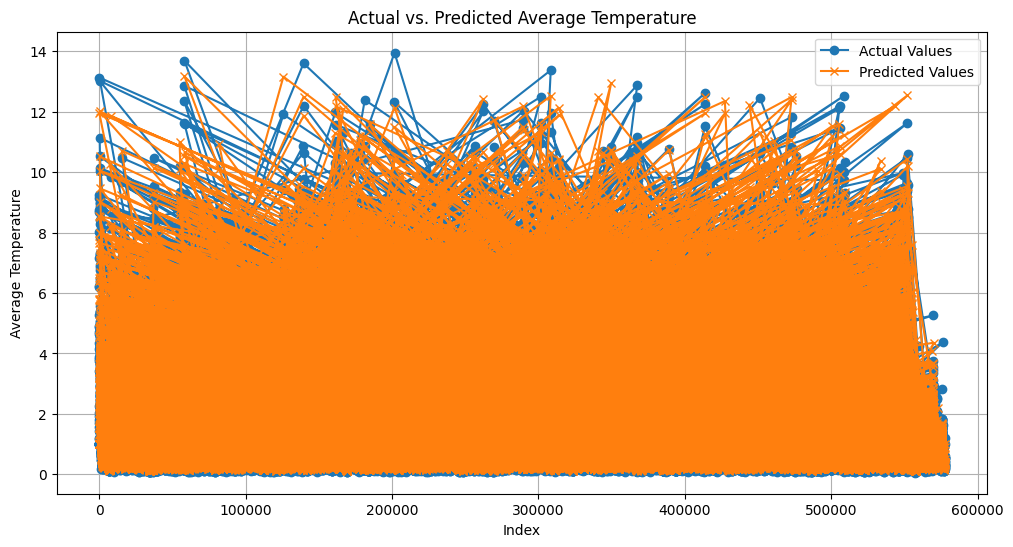

In [19]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['Actual'], label='Actual Values', marker='o')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted Values', marker='x')
plt.xlabel('Index')
plt.ylabel('Average Temperature')
plt.title('Actual vs. Predicted Average Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Taking an input
AverageTemperature = 27.5
year = 2024
month = 7
Country = "India"

# Preprocess the input data
def preprocess_input(AverageTemperature, year, month, Country, encoder):
    # Converting input data into a NumPy array
    features = np.array([[AverageTemperature, year, month]])

    # One-hot encode the country name
    country_encoded = encoder.transform([[Country]])

    # Concatenating all features
    input_data = np.concatenate((features, country_encoded), axis=1)
    return input_data

# Preprocess the example input
input_data = preprocess_input(AverageTemperature, year, month, Country, encoder)

# Make a prediction
predicted_uncertainty = model.predict(input_data)[0]

# Display the result
print(f"Predicted Temperature Uncertainty for {Country} in {month}/{year} with avg_temp {AverageTemperature}°C: {predicted_uncertainty:.2f}°C")

Predicted Temperature Uncertainty for India in 7/2024 with avg_temp 27.5°C: 0.37°C


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [21]:
# dumping the trained model and the encoder
import joblib
joblib.dump(model, 'model.pkl')


['model.pkl']

In [22]:
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']